In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

170498071/170498071 [==============================] - 41s 0us/step


In [3]:
# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))  # rate: Float between 0 and 1. Fraction of the input units to drop
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

In [5]:
# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
391/391 - 81s - loss: 1.7110 - accuracy: 0.3670 - val_loss: 1.3921 - val_accuracy: 0.4911 - 81s/epoch - 208ms/step
Epoch 2/30
391/391 - 84s - loss: 1.3192 - accuracy: 0.5271 - val_loss: 1.1225 - val_accuracy: 0.5973 - 84s/epoch - 214ms/step
Epoch 3/30
391/391 - 82s - loss: 1.1299 - accuracy: 0.5974 - val_loss: 1.0194 - val_accuracy: 0.6392 - 82s/epoch - 210ms/step
Epoch 4/30
391/391 - 87s - loss: 0.9898 - accuracy: 0.6496 - val_loss: 0.8635 - val_accuracy: 0.6995 - 87s/epoch - 223ms/step
Epoch 5/30
391/391 - 85s - loss: 0.9069 - accuracy: 0.6781 - val_loss: 0.8210 - val_accuracy: 0.7161 - 85s/epoch - 218ms/step
Epoch 6/30
391/391 - 85s - loss: 0.8507 - accuracy: 0.7005 - val_loss: 0.7663 - val_accuracy: 0.7310 - 85s/epoch - 217ms/step
Epoch 7/30
391/391 - 88s - loss: 0.7971 - accuracy: 0.7181 - val_loss: 0.7578 - val_accuracy: 0.7373 - 88s/epoch - 226ms/step
Epoch 8/30
391/391 - 93s - loss: 0.7545 - accuracy: 0.7351 - val_loss: 0.7220 - val_accuracy: 0.7479 - 93s/epoch - 238

In [6]:
# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

정확률은 79.93999719619751


In [7]:
import matplotlib.pyplot as plt

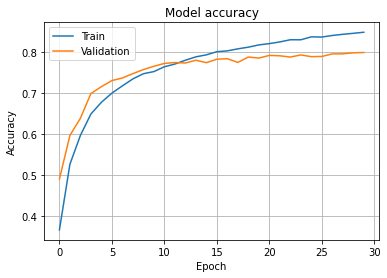

In [8]:
# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

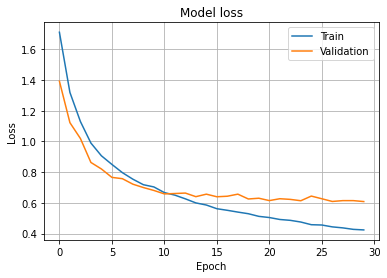

In [9]:
# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")